# Дискриминантный анализ
## Значения канонических переменных
Обозначения: $\xi$ -- с.в., принимающая значения $A_1, \ldots, A_k$, $\boldsymbol\eta = \boldsymbol\eta_i \in \mathbb R^p$ при $\xi = A_i$, $\forall i \in 1\mathbin{:}n\;\; \boldsymbol\eta_i \sim \mathcal{P}_i$.

$$\mathbb H = \mathrm E \left( \mathrm E\left(\boldsymbol\eta\middle\vert\xi\right) - \mathrm E \boldsymbol\eta \right) \left( \mathrm E\left(\boldsymbol\eta\middle\vert\xi\right) - \mathrm E \boldsymbol\eta \right) ^\mathsf T \in M_p\left(\mathbb R\right)$$
$$\mathbb E = \mathrm E \left( \boldsymbol\eta - \mathrm E\left(\boldsymbol\eta\middle\vert\xi\right)\right) \left( \boldsymbol\eta - \mathrm E\left(\boldsymbol\eta\middle\vert\xi\right) \right) ^\mathsf T \in M_p\left(\mathbb R\right)$$

На выборочном языке переписываются как
$$\mathbb H = \sum_{i=1}^k n_i \left( \bar{\mathbf y}_i - \bar{\mathbf y} \right) \left( \bar{\mathbf y}_i - \bar{\mathbf y} \right) ^\mathsf T$$
$$\mathbb E = \sum_{i=1}^k \sum_{j=1}^{n_i} \left( \mathbf y_{ij} - \bar{\mathbf y}_i \right) \left( \mathbf y_{ij} - \bar{\mathbf y}_i \right) ^\mathsf T$$

Работаем в модели $\eta_i \sim \mathcal N \left( \mu_i, \Sigma \right)$

Пусть мы хотим найти такой признак, который наиболее хорошо описывает межгрупповые различия. Этот признак задаётся вектором $A$, на который умножается матрица исходных данных ($\mathbb Y = \mathbb X^\mathsf T$), $Z = \mathbb Y A$. Тогда его дисперсия $\mathrm D Z = Z^\mathsf T Z = (\mathbb Y A)^\mathsf T \mathbb Y A = A^\mathsf T \mathbb Y^\mathsf T \mathbb Y A$. Дисперсия данных $\mathbb Y^\mathsf T \mathbb Y = \mathbb H + \mathbb E$, сумме межгрупповой и внутригрупповой дисперсии соответственно. Тогда $$\mathrm D Z = \underbrace{A^\mathsf T \mathbb H A}_{\mathclap{\text{межгрупповая дисперсия}}} + \overbrace{A^\mathsf T \mathbb E A}^{\mathclap{\text{внутригрупповая  дисперсия}}}.$$
Наиболее хорошо различающее группы отображение максимизирует межгрупповые различия и минимизирует внутригрупповые различия. А именно, $$\frac{A^\mathsf T \mathbb H A}{A^\mathsf T \mathbb E A} \to \max.$$
Из линейной алгебры нам известно, что максимум отображения такого вида достигается на первом (максимальном) векторе $\mathbb E^{-1}\mathbb H$ и равен первому собственному вектору этой матрицы. Также известны максимумы на подпространствах, ортогональных предыдущим через матрицу внутригрупповой дисперсии (максимум на множестве $\left\lbrace Z \middle\vert \forall i < j \:Z^\mathrm T \mathbb E U_i = 0 \right\rbrace$ достигается на $U_j$ и равен $\lambda_j$).

Такие признаки (максимально хорошо разделяющие данные) называются каноническими переменными (дискриминантными значениями), а соответствующие вектора коэффициентов -- каноническими коэффициентами (дискриминантными функциями).

Посмотрим на канонические переменные на примере с вином.

In [1]:
wine <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
names(wine) <- c("type", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", 
                 "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
                 "Proanthocyanins", "Color intensity", "Hue", 
                 "OD280/OD315 of diluted wines", "Proline")

In [2]:
wine$type <- factor(wine$type)
head(wine)

type Alcohol Malic acid  Ash Alcalinity of ash Magnesium Total phenols
1    1   13.20       1.78 2.14              11.2       100          2.65
2    1   13.16       2.36 2.67              18.6       101          2.80
3    1   14.37       1.95 2.50              16.8       113          3.85
4    1   13.24       2.59 2.87              21.0       118          2.80
5    1   14.20       1.76 2.45              15.2       112          3.27
6    1   14.39       1.87 2.45              14.6        96          2.50
  Flavanoids Nonflavanoid phenols Proanthocyanins Color intensity  Hue
1       2.76                 0.26            1.28            4.38 1.05
2       3.24                 0.30            2.81            5.68 1.03
3       3.49                 0.24            2.18            7.80 0.86
4       2.69                 0.39            1.82            4.32 1.04
5       3.39                 0.34            1.97            6.75 1.05
6       2.52                 0.30            1.98            5.25 1.02
  OD280/OD315 of diluted wines Proline
1                         3.40    1050
2                         3.17    1185
3                         3.45    1480
4                         2.93     735
5                         2.85    1450
6                         3.58    1290

Можно посмотреть на данные:

In [3]:
require(car)

Loading required package: car


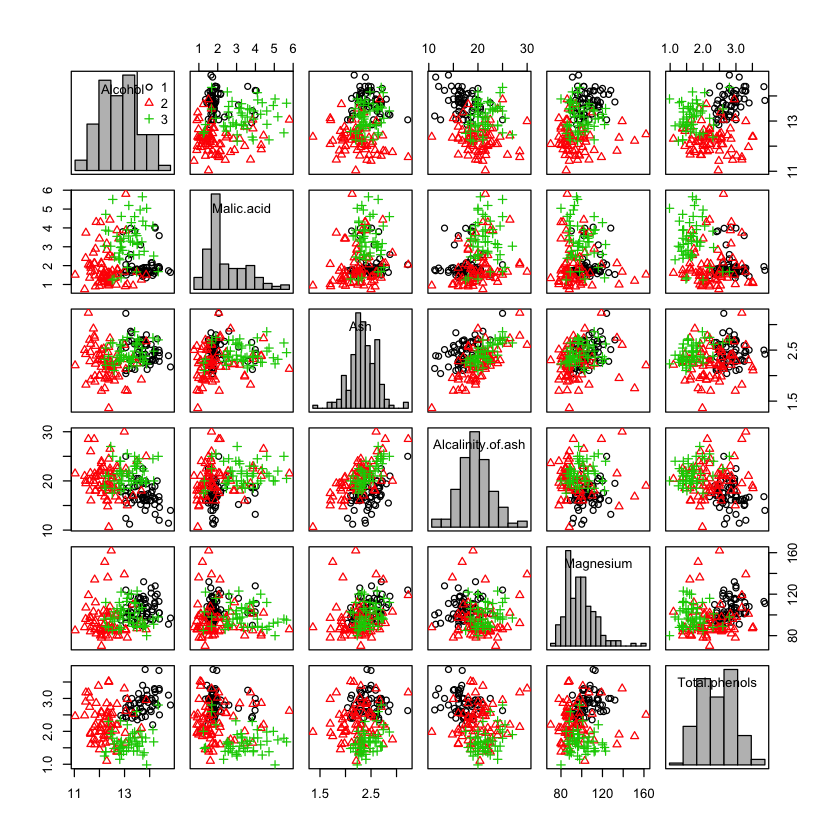

In [4]:
scatterplotMatrix(wine[2:7], groups = wine$type, diagonal = "histogram", 
                  smoother = FALSE, reg.line = FALSE)

На стандартных графиках "точка против точки" различий между группами не видно.

Проведём линейный дискриминантный анализ, чтобы узнать, объяснимо ли имеющееся разделение на группы и выработать правила для классификации новых образцов.

In [5]:
require(MASS)

Loading required package: MASS


In [6]:
wine.lda <- lda(type ~ ., data = wine)
print(wine.lda)

Call:
lda(type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0.3276836 0.4011299 0.2711864 

Group means:
   Alcohol `Malic acid`      Ash `Alcalinity of ash` Magnesium `Total phenols`
1 13.73638     2.015862 2.456034            17.06207  105.9828        2.840862
2 12.27873     1.932676 2.244789            20.23803   94.5493        2.258873
3 13.15375     3.333750 2.437083            21.41667   99.3125        1.678750
  Flavanoids `Nonflavanoid phenols` Proanthocyanins `Color intensity`       Hue
1  2.9810345              0.2901724        1.892586          5.526379 1.0624138
2  2.0808451              0.3636620        1.630282          3.086620 1.0562817
3  0.7814583              0.4475000        1.153542          7.396250 0.6827083
  `OD280/OD315 of diluted wines`   Proline
1                       3.144655 1116.5862
2                       2.785352  519.5070
3                       1.683542  629.8958

Coefficients of linear discriminants:
            

Исходные вероятности групп посчитаны в соответствии с количеством индивидов в каждой группе ($\frac{n_i}{n}$, если $n_i$ -- число наблюдений в $i$-й группе, $n$ -- общее число наблюдений).

`Coefficients of linear discriminants` -- коэффициенты, с которыми соответствующие исходные признаки входят в соответствующие канонические функции. Эти данные лучше смотреть на графике:

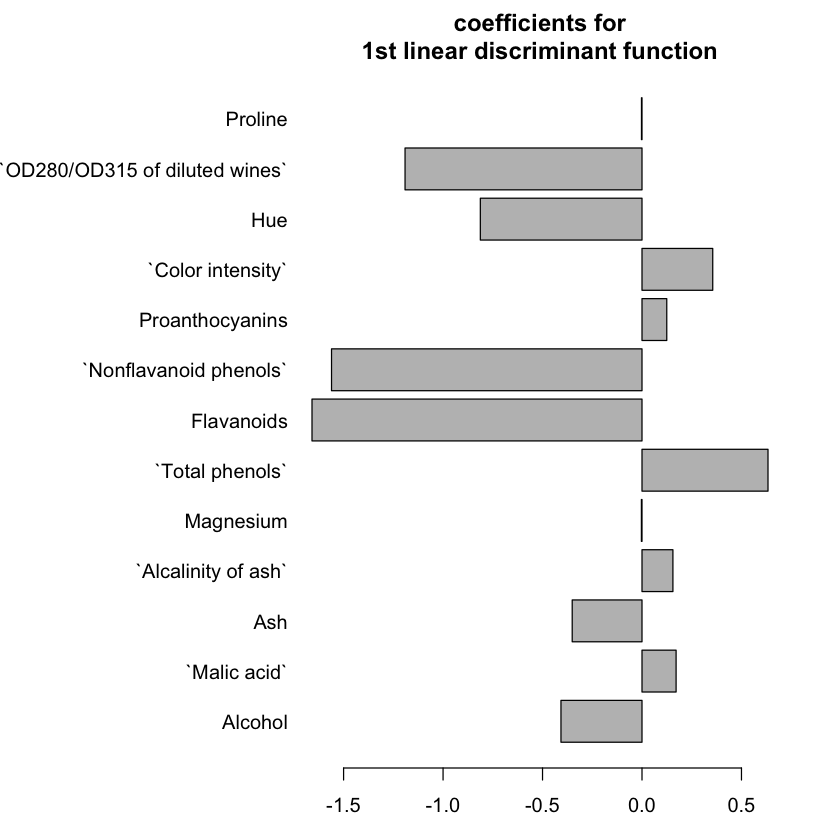

In [7]:
par(mar=c(3,13,3,3))
barplot(wine.lda$scaling[, "LD1"], horiz = TRUE, las = 1, 
        main = "coefficients for\n1st linear discriminant function")

Так как перед началом анализа данные не были стандартизованы, по коэффициентам нельзя судить о "вкладах" в соответствующие канонические переменные.

Качество объяснения данных каноническими переменными указано в `Proportion of trace`: это отношение $i$-го собственного числа к сумме всех собственных чисел.

Чтобы визуально оценить качество объяснения каноническими переменными, нужно посмотреть, как выглядят данные в канонических координатах (в координатах канонических переменных), тем более что координат всего две. Для этого сначала посчитаем значения канонических переменных для данных. `predict.lda` возвращает классификацию и значения канонических переменных:

In [8]:
wine.lda.values <- predict(wine.lda)

И посмотрим, какие значения канонических переменных какой группе сопоставляются:

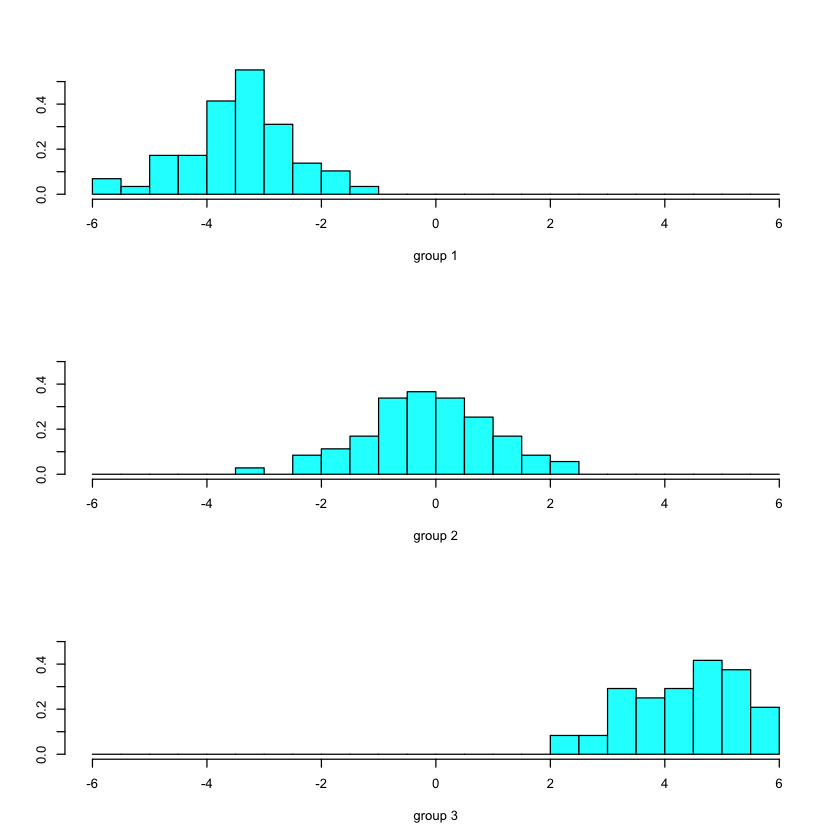

In [9]:
ldahist(data = wine.lda.values$x[,1], g=wine$type)

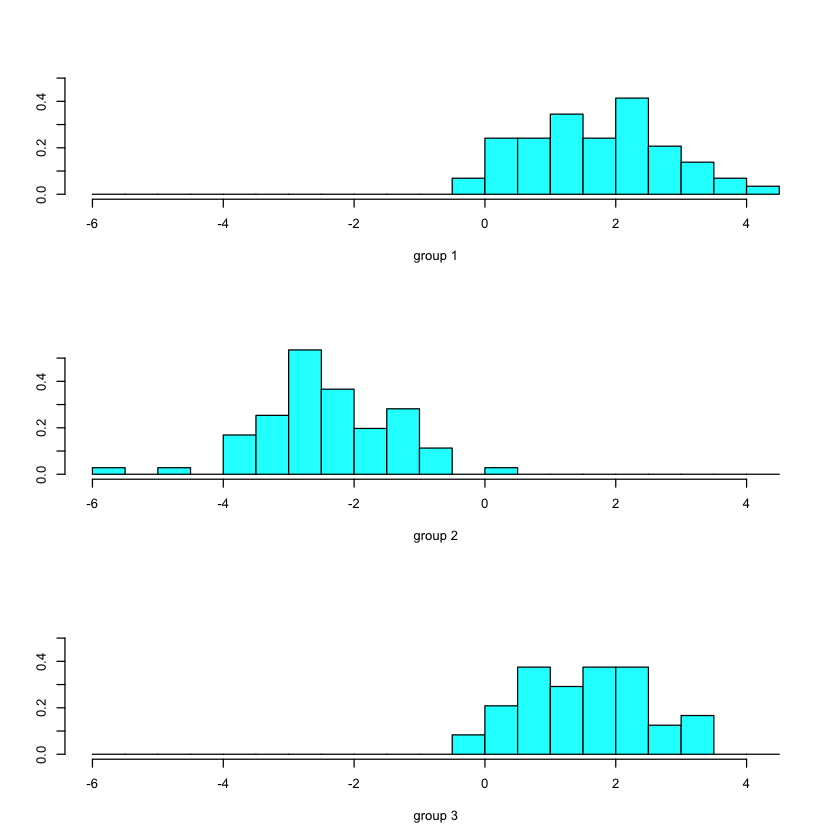

In [10]:
ldahist(data = wine.lda.values$x[,2], g=wine$type)

В двумерном пространстве:

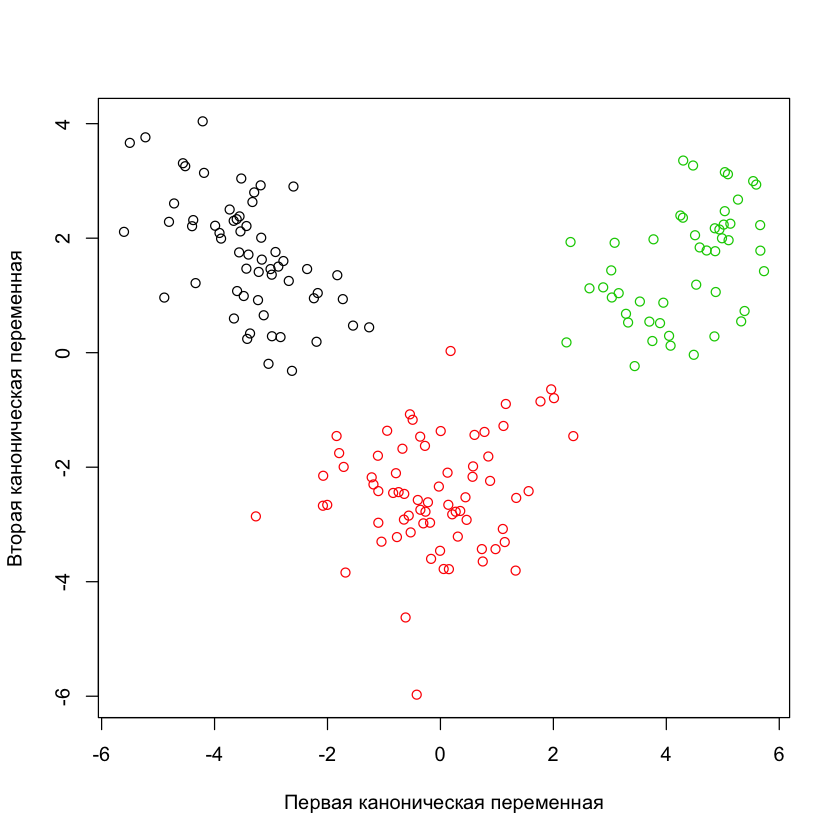

In [11]:
options(warn=-1)
plot(wine.lda.values$x[,1], wine.lda.values$x[,2], col = wine$type, 
     xlab = "Первая каноническая переменная", ylab = "Вторая каноническая переменная")

Насколько хорошо канонические функции предсказывают истинные значения переменных? Можно посмотреть, сколько ошибок предсказания было сделано:

In [12]:
print(table(wine.lda.values$class, wine$type))

   
     1  2  3
  1 58  0  0
  2  0 71  0
  3  0  0 48


То есть в нашем случае не было сделано ни одной ошибки классификации.

Случай, когда канонических переменных много, посмотрим на смоделированных данных.

In [13]:
k = 10  # number of classes
p = 25  # number of features
mu <- matrix(sample(-100:100, p*k, replace = TRUE), nrow = p)
generate.cov.matrix <- function (dim, range = -10:10) {
    m <- matrix(sample(range, dim*dim, replace = TRUE), nrow = dim)
    m %*% t(m)
}
sigma <- generate.cov.matrix(p)

In [14]:
generate.class <- function(i) {
    n <- sample(50:250, 1)
    data <- mvrnorm(n, mu[,i], sigma)
    data <- data.frame(data)
    data$type <- i
    return(data)
}

In [15]:
data <- apply(X = array(1:k), MARGIN = 1, FUN = generate.class)
data <- Reduce(rbind, data)
data$type <- factor(data$type)
head(data)

X1        X2          X3         X4        X5         X6        X7
1 47.95972 115.07146 -67.4775187  -94.81777  9.513957   7.986047 113.93253
2 28.25209  65.62712  -3.4147311 -150.56594 29.052197  -9.931933  30.63077
3 48.98478  65.12550 -61.9231110 -135.89702 39.441977 -11.875753  42.14979
4 45.04279  60.84155   0.2631296  -62.19673 62.046021 -11.431118 -24.31227
5 77.75279  71.09674 -32.9584129  -75.70980 64.953904 -32.921989 -17.86105
6 49.71147 104.97992 -53.5712370 -110.41654 -2.057933 -11.883228  87.71271
         X8         X9       X10        X11        X12        X13       X14
1 -33.47064  13.115579 -85.20982  40.309771  -89.79212   13.85633 27.062004
2 -20.19013 -57.313992 -41.16703  37.968960  -46.83281 -160.33983 83.990059
3 -54.67321   3.170949 -50.42386  -7.513996 -114.21518  -83.30330 42.463618
4 -35.03266  -2.550194 -59.49349   9.504837  -39.29446  -47.05192  5.885971
5 -35.40875 -39.003848 -31.90205 -23.180448  -94.20108 -134.56943 13.347342
6 -48.38572 -23.335105 -51.40198  -5.426703 -131.85795  -86.75436 92.268781
       X15        X16        X17       X18        X19       X20         X21
1 19.04830 -21.851840 -101.39380 -21.93414  -41.98066 -13.85080   -4.871474
2 46.04001   9.092786  -92.75389  11.18889  -74.22393  44.29484   15.017019
3 37.33263 -17.747629 -103.32966  30.15527  -74.43923  16.95629  -29.799892
4 36.97851 -86.330287 -104.90450 -11.49101  -84.97127  54.24963  -31.136045
5 75.54809 -74.741147  -99.18280  58.41058 -105.77758  61.43297 -130.472526
6 25.97310 -24.472087 -114.10140  34.12664  -77.07666  25.56511  -81.220724
       X22        X23       X24       X25 type
1 99.88399 -54.616149 101.52319 109.76059    1
2 78.93399 -78.231672  68.33439  41.53059    1
3 47.10460 -36.833376  82.33677  64.54126    1
4 58.11204  36.733555 108.29912  88.78726    1
5 39.14233   6.958676 115.51856  27.34625    1
6 64.59660 -48.567819 116.39109  16.62217    1

Получили несбалансированный набор наблюдений из 10 классов, каждое наблюдение состоит из 25 признаков.

In [16]:
data.lda <- lda(type ~ ., data = data)

Получили 9 дискриминантных функций, вклад которых можно посмотреть

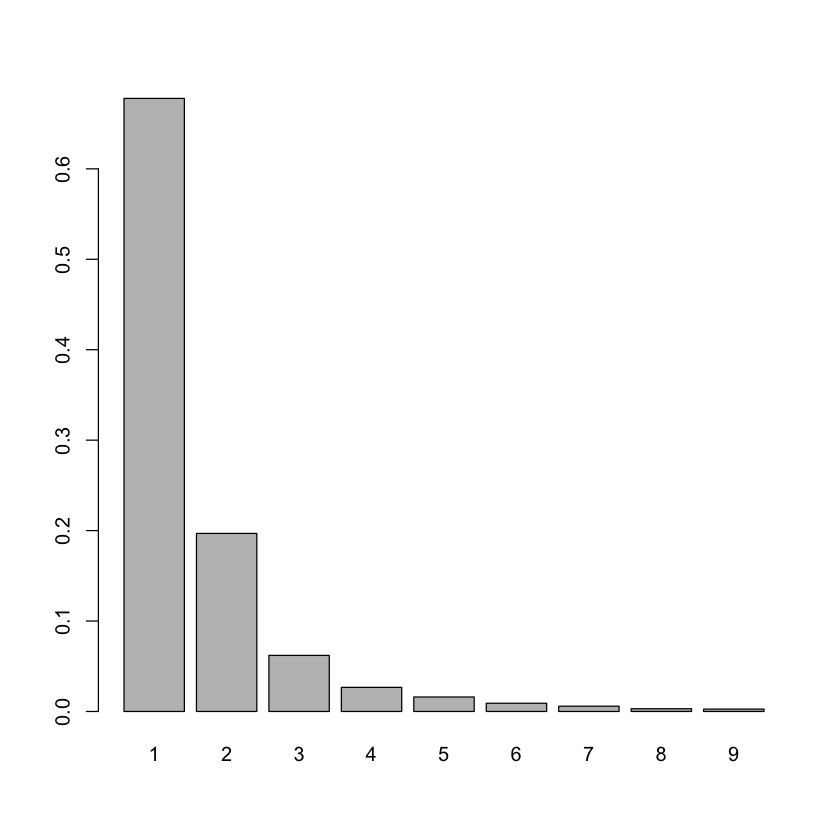

In [17]:
barplot(data.lda$svd^2 / sum(data.lda$svd^2), names.arg = 1:length(data.lda$svd))

По картинке хочется сказать, что две первые дискриминантные функции полностью описывают различия в данных. Значимость можно проверить и статистически: гипотеза $H_0:$ дискриминантные функции от $l$-й до последней не описывают различия в данных эквивалентна $H_0: \forall i \in l\mathbin : s \;\;\lambda_i = 0$ (где $s$ -- общее число дискриминантных функций), для которой известно распределение
$$\Lambda'_l = \prod_{i=l}^s \frac{1}{1 + \lambda_i} \sim \Lambda_p\left(\nu_H + \left(l-1\right), \nu_E - \left(l-1\right)\right),$$
где $\nu_H = k-1$, $\nu_E = n-k$. Воспользовавшись приближением 
$$\left(\frac{p - \nu_B + 1}{2} - \nu_A\right)\log \Lambda_p\left(\nu_A, \nu_B\right) \overset{\sim}{\underset{\nu_B\to\infty}{\to}} \chi^2\left(p\nu_B\right),$$
можно посчитать $p$-value для $H_0$ для каждого $l\in 1\mathbin : s$.

$$\mathrm P\left(\Lambda_p\left(\nu_A, \nu_B\right) < x\right) = $$ 
$$ = \mathrm P\left(\left(\frac{p - \nu_B + 1}{2} - \nu_A\right)\log \Lambda_p\left(\nu_A, \nu_B\right) < \left(\frac{p - \nu_B + 1}{2} - \nu_A\right)\log x\right)\overset{\sim}{\underset{\nu_B\to\infty}{\to}} $$ $$ \overset{\sim}{\underset{\nu_A\to\infty}{\to}} \mathrm P\left(\chi^2\left(p\nu_B\right) < \left(\frac{p - \nu_B + 1}{2} - \nu_A\right)\log x\right) = $$ $$ = F_{\chi^{2}\left(p\nu_B\right)}\left(\left(\frac{p - \nu_B + 1}{2} - \nu_A\right)\log x\right).$$
Научимся считать это значение:

In [18]:
plambda <- function (x, p, nuA, nuB) {
    c <- (p - nuB + 1 - 2*nuA) / 2
    pchisq(c * log(x), p * nuB)
}

И посчитаем $p$-value для каждого $l\in 1\mathbin : s$.

In [19]:
nuH <- length(levels(data$type)) - 1
nuE <- NROW(data) - length(levels(data$type))
for (l in 1:length(data.lda$svd)) {
    t <- prod(1 / (data.lda$svd[l:length(data.lda$svd)] - 1))  # ineffective, but doesn't matter
    print(sprintf("Factor %i: p-value %f", l, plambda(t, length(data) - 1, nuH + l - 1, nuE - l + 1)))
}

[1] "Factor 1: p-value 0.000000"
[1] "Factor 2: p-value 0.000000"
[1] "Factor 3: p-value 0.000000"
[1] "Factor 4: p-value 0.000000"
[1] "Factor 5: p-value 0.000000"
[1] "Factor 6: p-value 0.000000"
[1] "Factor 7: p-value 0.000000"
[1] "Factor 8: p-value 0.000000"
[1] "Factor 9: p-value 0.000000"


Здесь что-то пошло не так, но что -- непонятно.

Посмотрим на данные в координатах дискриминантных функций:

In [24]:
data.lda.values <- predict(data.lda)

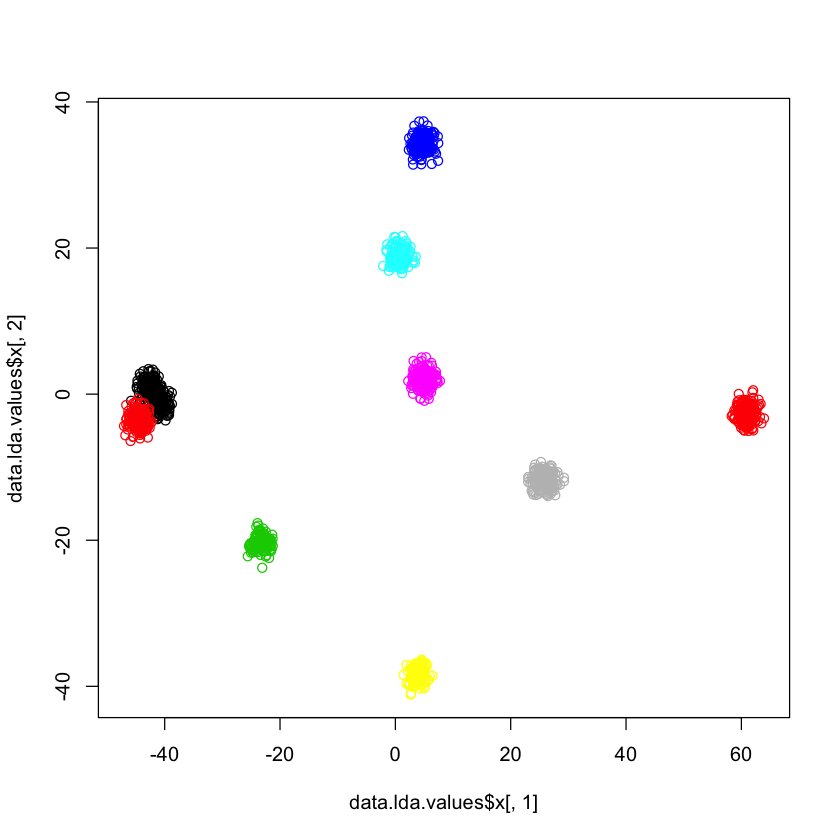

In [25]:
plot(data.lda.values$x[,1], data.lda.values$x[,2], col = data$type)

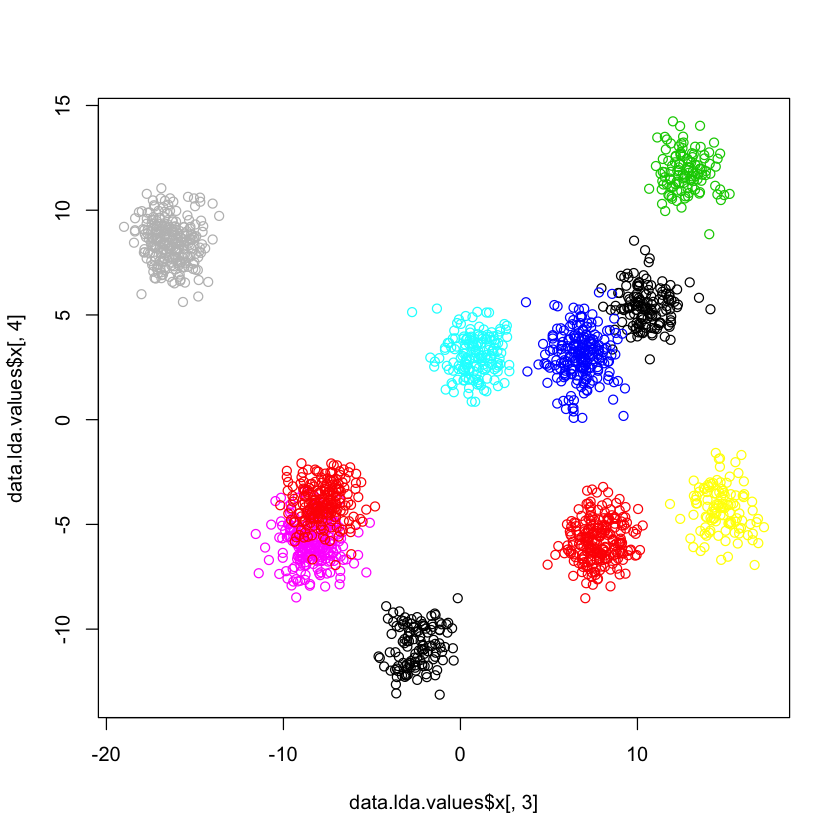

In [26]:
plot(data.lda.values$x[,3], data.lda.values$x[,4], col = data$type)